In [1]:
import pandas as pd

CocCocData = pd.read_csv('sample.txt', sep=" ", header=None  )
CocCocData.columns =['date','time','id','domain']
CocCocData.head()

,date,time,id,domain
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com
4,2019-02-25,00:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com


In [2]:
len(CocCocData)

70000

In [3]:
CocCocData['DateTime'] = pd.to_datetime(CocCocData['date'] + ' ' + CocCocData['time'])

# 1) Tìm DAU CocCoc


In [4]:
# Copy để xử lý
Customer_new = CocCocData.copy()

In [5]:
Customer_Daily = Customer_new.groupby(["date",'id']).size().reset_index(name="Freq")

In [6]:
Customer_Daily

,date,id,Freq
0,2019-02-25,--P4olDvaVSPHmd5g1P4vg..,1
1,2019-02-25,-0FVtqrfvXbTEGei4khZDw..,1
2,2019-02-25,-0UwiLGss1Tiry7P7Crx9Q..,1
3,2019-02-25,-0h6oyc3V2FWsU1KQV5EBQ..,1
4,2019-02-25,-1hSqWS352Lp4P0c4XdBDQ..,1
...,...,...,...
68953,2019-03-03,zz1wXt6dsYXQnTgZY8iXag..,1
68954,2019-03-03,zz4F50FYqX8XpsPC1Z9wZw..,1
68955,2019-03-03,zzVDNzCUa-3m_C-lx7rR2Q..,1
68956,2019-03-03,zzcCOQ1XK7pI4RaONQSSUw..,1


In [7]:
Customer_DAU = Customer_Daily.groupby(["date"]).size().reset_index(name="Freq")

In [8]:
Customer_DAU

,date,Freq
0,2019-02-25,9857
1,2019-02-26,9862
2,2019-02-27,9870
3,2019-02-28,9871
4,2019-03-01,9844
5,2019-03-02,9834
6,2019-03-03,9820


# 2) Tìm DAU using domain Facebook

In [11]:
Domain_Daily = Customer_new.groupby(["date","domain"]).size().reset_index(name="Freq")

In [12]:
Domain_Daily = Customer_new.groupby(["date",'id',"domain"]).size().reset_index(name="Freq")

In [13]:
Domain_Daily.sort_values('Freq',ascending=False)

,date,id,domain,Freq
51253,2019-03-02,85T2Apqw0R-03pNVvjkHGA..,m.youtube.com,4
11432,2019-02-26,85T2Apqw0R-03pNVvjkHGA..,m.youtube.com,4
27447,2019-02-27,k3TRh__bm2-45JIvlv1Q5A..,coccoc.com,3
38401,2019-02-28,q9pwxhke_WWUIfQO5zETfA..,www.youtube.com,3
8206,2019-02-25,oXemO8UBCPyIGpcQvrRKVA..,www.facebook.com,3
...,...,...,...,...
23304,2019-02-27,KAMBpMYBkSfkXv35Jq6FWA..,m.kenh14.vn,1
23305,2019-02-27,KAMBpMYBkSfkXv35Jq6FWA..,m.youtube.com,1
23306,2019-02-27,KAQ26Iqxjj9x6Z6Q24TWZQ..,coccoc.com,1
23307,2019-02-27,KBTNIZzE0h7RSvkH84GrMQ..,www.facebook.com,1


In [14]:
Face_Daily = Domain_Daily[Domain_Daily.domain.str.contains('facebook')]

In [15]:
Face_Daily .sort_values('Freq',ascending=False)

,date,id,domain,Freq
8206,2019-02-25,oXemO8UBCPyIGpcQvrRKVA..,www.facebook.com,3
59431,2019-03-02,xGSCgwtyAIJLndfkMO32jw..,m.facebook.com,2
61060,2019-03-03,6Qt99PP4WAh8GobWcEbkkg..,www.facebook.com,2
60835,2019-03-03,4yqnrLkjLQJPhHwr-dc8pQ..,www.facebook.com,2
42506,2019-03-01,FefDTGpARZLX_lsidWsE9g..,www.facebook.com,2
...,...,...,...,...
23485,2019-02-27,LK1NXlv3jDuox_2rXjzKMQ..,www.facebook.com,1
23487,2019-02-27,LKntlRkftvx7r_eOD2Psgw..,www.facebook.com,1
23491,2019-02-27,LMIcrz602KSRDSgg00EBJA..,www.facebook.com,1
23493,2019-02-27,LNkZI3CQ1pohUwU8rwYUWg..,www.facebook.com,1


In [16]:
Face_DAU = Face_Daily.groupby(["date"]).size().reset_index(name="Freq")

In [17]:
Face_DAU

,date,Freq
0,2019-02-25,2609
1,2019-02-26,2541
2,2019-02-27,2607
3,2019-02-28,2408
4,2019-03-01,2615
5,2019-03-02,2688
6,2019-03-03,2700


# 3) Traffic Distribution by hours

In [18]:
Customer_new['hour'] = pd.to_datetime(Customer_new['time'])

In [19]:
pd.to_datetime(Customer_new['time'])

0       2020-10-23 12:53:01
1       2020-10-23 11:58:01
2       2020-10-23 14:29:01
3       2020-10-23 20:52:01
4       2020-10-23 00:58:01
                ...        
69995   2020-10-23 17:56:01
69996   2020-10-23 19:40:01
69997   2020-10-23 12:04:01
69998   2020-10-23 00:54:01
69999   2020-10-23 21:44:02
Name: time, Length: 70000, dtype: datetime64[ns]

In [20]:
Customer_new

,date,time,id,domain,DateTime,hour
0,2019-02-25,12:53:01,a37agOUtUEQiyagcdU2TAA..,youtube.com,2019-02-25 12:53:01,2020-10-23 12:53:01
1,2019-02-25,11:58:01,5wGdzKx3Kf4WK0gNfwZPpw..,www.google.com,2019-02-25 11:58:01,2020-10-23 11:58:01
2,2019-02-25,14:29:01,ZoVXA0kss3EZXHWxv96EXA..,trangtraiviet.vn,2019-02-25 14:29:01,2020-10-23 14:29:01
3,2019-02-25,20:52:01,SE5aS0u9gRYDV76kCwilXQ..,vn.yahoo.com,2019-02-25 20:52:01,2020-10-23 20:52:01
4,2019-02-25,00:58:01,EGYc8cXe6GVDH3qp-qnPSQ..,www.youtube.com,2019-02-25 00:58:01,2020-10-23 00:58:01
...,...,...,...,...,...,...
69995,2019-03-03,17:56:01,ep7D0dpRFjKYLV8WNv4qhA..,www.google.com,2019-03-03 17:56:01,2020-10-23 17:56:01
69996,2019-03-03,19:40:01,YczVvu-ZARiSFPMCpY4R2g..,www.googleadservices.com,2019-03-03 19:40:01,2020-10-23 19:40:01
69997,2019-03-03,12:04:01,tmmVRJwUubpbs649mEVuLA..,www.youtube.com,2019-03-03 12:04:01,2020-10-23 12:04:01
69998,2019-03-03,00:54:01,3T3iWxyAllzLH1Tu-ezJUg..,www.facebook.com,2019-03-03 00:54:01,2020-10-23 00:54:01


In [21]:
Customer_new['hour'] = Customer_new['DateTime'].dt.hour

In [22]:
Hour_Trafic = Customer_new.groupby(['hour']).size().reset_index(name="Traffic")

In [23]:
Hour_Trafic.sort_values('Traffic', ascending=False)

,hour,Traffic
20,20,5514
21,21,5128
15,15,4613
14,14,4446
19,19,4349
10,10,4313
16,16,4183
9,9,4095
11,11,4038
22,22,3775


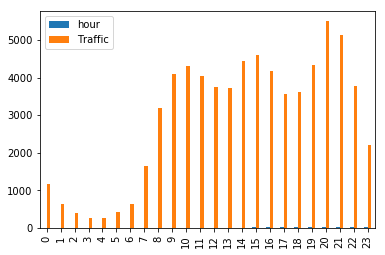

In [30]:
Hour_Trafic.plot.bar()

# 4) Top 10 domains by traffic.

In [26]:
Domain_Trafic = Customer_new.groupby(['domain']).size().reset_index(name="Traffic")

In [27]:
Domain_Trafic.sort_values('Traffic', ascending=False)[0:9]

,domain,Traffic
5321,www.facebook.com,17403
6153,www.youtube.com,13648
959,coccoc.com,6177
5394,www.google.com,3657
2663,mail.google.com,2250
5399,www.google.com.vn,1516
4423,translate.google.com,1074
299,accounts.google.com,776
4424,translate.google.com.vn,773


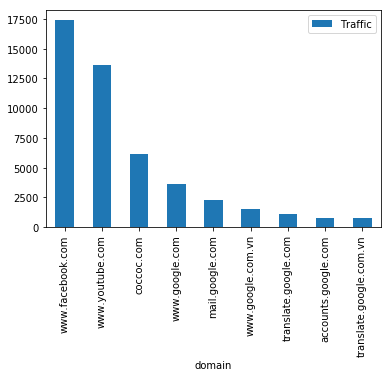

In [34]:
Domain_Trafic.sort_values('Traffic', ascending=False)[0:9].plot.bar("domain")